In [ ]:
# Importa todas as funções e constantes da biblioteca OpenGL para gráficos
from OpenGL.GL import *
# Importa todas as funções e constantes do GLUT (utilitário para criar janelas e interações com OpenGL)
from OpenGL.GLUT import *


# Função de callback responsável por desenhar na tela
def display():
    glClear(GL_COLOR_BUFFER_BIT)  # Limpa o buffer de cor, preparando a tela para um novo desenho

    glColor3f(1.0, 0.0, 0.0)      # Define a cor atual para vermelho (RGB: 1, 0, 0)

    glBegin(GL_POLYGON)          # Inicia o desenho de um polígono
    glVertex3f(0.0, 0.0, 0.0)     # Primeiro vértice (canto inferior esquerdo)
    glVertex3f(1.0, 0.0, 0.0)     # Segundo vértice (canto inferior direito)
    glVertex3f(0.0, 1.0, 0.0)     # Terceiro vértice (canto superior esquerdo)
    glVertex3f(0.0,0.0,0.0)
    glVertex3f(-1.0,0.0,0.0)
    glVertex3f(0.0,1.0,0.0)
    glVertex3f(0.0,0.0,0.0)
    glVertex3f(1.0, 0.0, 0.0)
    glVertex3f(0.0, -1.0, 0.0)
    glVertex3f(0.0,0.0,0.0)
    glVertex3f(-1.0, 0.0, 0.0)
    glVertex3f(0.0, -1.0, 0.0)
    
    glEnd()                      # Finaliza o desenho do polígono

    glFlush()                    # Força a execução imediata de todos os comandos OpenGL pendentes


# Inicializa o GLUT (biblioteca de janelas e eventos para OpenGL)
glutInit()

# Define o modo de exibição da janela:
# GLUT_SINGLE: usa um único buffer de exibição
# GLUT_RGB: usa o sistema de cores RGB
glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB)

# Define o tamanho da janela em pixels (largura x altura)
glutInitWindowSize(350, 350)

# Define a posição inicial da janela na tela (em pixels a partir do canto superior esquerdo)
glutInitWindowPosition(500, 150)

# Cria a janela com o título "hello" e salva o identificador da janela na variável `wind`
wind = glutCreateWindow("hello")

# Define a cor de fundo da janela (preto com opacidade 0)
glClearColor(0.0, 0.0, 0.0, 0.0)

# Registra a função de exibição (display) como a responsável por renderizar o conteúdo da janela
glutDisplayFunc(display)

# Inicia o loop principal do GLUT — mantém a janela aberta e responde a eventos (como renderizar e interações)
glutMainLoop()


Existe arquivo: True


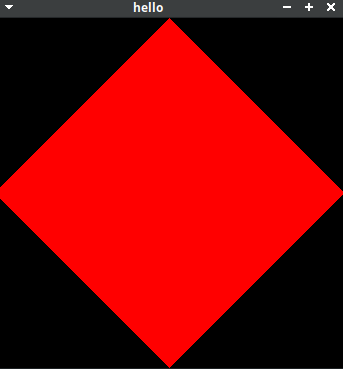

In [1]:
import os
from PIL import Image
from IPython.display import display

caminho = r'/home/camerino/Área de Trabalho/Estudos/7-Semestre/Introdução à Computação Gráfica/codes/Captura de tela_2025-07-22_16-15-26.png'
print('Existe arquivo:', os.path.exists(caminho))

img = Image.open(caminho)
display(img)


In [2]:
# Importa as bibliotecas necessárias do OpenGL
from OpenGL.GL import *         # Funções principais do OpenGL
from OpenGL.GLU import *        # Funções utilitárias do OpenGL (ex: projeções)
from OpenGL.GLUT import *       # Toolkit de utilidades para OpenGL (janela, input, etc)
import pywavefront              # Biblioteca para carregar arquivos .obj (modelos 3D)

# Observação: os pacotes abaixo precisam ser instalados com pip se ainda não estiverem:
# pip install pywavefront
# pip install pyglet

# Variáveis de rotação
T = 0.2     # Rotação no eixo Z
T2 = 0      # Rotação no eixo Y
T3 = 0      # Rotação no eixo X

quadric = None  # Referência a um objeto quadrico do OpenGL (ex: cilindros, esferas)

# Função responsável por desenhar na tela
def display():
    global quadric
    global T
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)  # Limpa buffers de cor e profundidade
    glMatrixMode(GL_MODELVIEW)      # Define modo de matriz para modelagem e visualização
    glPushMatrix()                  # Salva a matriz atual

    # Aplica rotações
    glRotatef(T ,0,0,1)             # Rotação em torno do eixo Z
    glRotatef(T2,0,1,0)             # Rotação em torno do eixo Y
    glRotatef(T3,1,0,0)             # Rotação em torno do eixo X

    glColor3f(0.7, 0.7, 0.7)        # Define cor cinza claro

    # Obtém os vértices do objeto carregado (.obj)
    vertice = objeto.materials['default0'].vertices
    triang_count = len(vertice) / 3  # Cada triângulo tem 3 vértices

    # Habilita uso de arrays de vértices
    glEnableClientState(GL_VERTEX_ARRAY)
    glVertexPointer(3, GL_FLOAT, 0, vertice)          # Passa array de vértices
    glDrawArrays(GL_TRIANGLES, 0, int(triang_count))  # Desenha os triângulos

    glPopMatrix()          # Restaura a matriz original
    glutSwapBuffers()      # Troca os buffers (janela dupla)

# Função para tratar teclas especiais (setas e page up/down)
def Keys(key, x, y):
    global T, T2, T3
    if(key == GLUT_KEY_LEFT ): 
        T -= 5 
    elif(key == GLUT_KEY_RIGHT ): 
        T += 5 
    elif(key == GLUT_KEY_UP ): 
        T2 -= 5 
    elif(key == GLUT_KEY_DOWN ): 
        T2 += 5 
    elif(key == GLUT_KEY_PAGE_UP ): 
        T3 += 5 
    elif(key == GLUT_KEY_PAGE_DOWN ): 
        T3 -= 5         

# Função de animação que atualiza a tela em loop
def animacao(value):
    glutPostRedisplay()                # Solicita nova renderização
    glutTimerFunc(30, animacao, 1)     # Chama novamente após 30ms

# Função de inicialização do ambiente OpenGL
def init():
    global quadric
    glClearColor( 0.0, 0.0, 0.0, 0.0 )     # Cor de fundo preta
    glClearDepth( 1.0 )                   # Profundidade máxima

    glHint( GL_PERSPECTIVE_CORRECTION_HINT, GL_NICEST )  # Melhor qualidade possível

    # Configuração de iluminação ambiente
    glLightModelfv( GL_LIGHT_MODEL_AMBIENT, [0.3, 0.3, 0.3, 1.0] )
    glLightfv( GL_LIGHT0, GL_AMBIENT, [ 0.3, 0.3, 0.3, 1.0] )
    glLightfv( GL_LIGHT0, GL_DIFFUSE, [0.6, 0.6, 0.6, 1] )
    glLightfv( GL_LIGHT0, GL_POSITION, [2.0, 2.0, 1.0, 0.0])

    glEnable( GL_LIGHT0 )                 # Habilita fonte de luz 0
    glEnable( GL_COLOR_MATERIAL )         # Ativa cor do material
    glShadeModel( GL_SMOOTH )             # Sombreamento suave
    glLightModeli( GL_LIGHT_MODEL_TWO_SIDE, GL_FALSE )  # Iluminação em uma face só

    glEnable(GL_DEPTH_TEST)              # Habilita teste de profundidade
    glDepthMask(GL_TRUE)                # Ativa escrita no buffer de profundidade
    glDepthFunc(GL_LEQUAL)              # Teste de profundidade padrão
    glDepthRange(0.0, 1.0)              # Intervalo de profundidade

    # Criação de objeto quadric (caso deseje usar cilindros, esferas, etc)
    quadric = gluNewQuadric()								
    gluQuadricNormals(quadric, GLU_SMOOTH)				
    gluQuadricTexture(quadric, GL_TRUE)

# Inicialização do GLUT
glutInit()
glutInitDisplayMode(GLUT_DEPTH | GLUT_DOUBLE | GLUT_RGB)   # Habilita profundidade, buffers duplos e cor RGB
glutInitWindowSize(500, 500)       # Tamanho da janela
glutInitWindowPosition(100, 100)   # Posição da janela na tela
wind = glutCreateWindow("A Coisa") # Cria a janela com título

init()  # Inicializa configurações de OpenGL

# Carrega o modelo 3D no formato .obj
objeto = pywavefront.Wavefront('coisa.obj')

# Registra funções no GLUT
glutDisplayFunc(display)         # Função de desenho
glutTimerFunc(30, animacao, 1)  # Função de animação (chamada a cada 30ms)
glutSpecialFunc(Keys)           # Função de teclas especiais
glutMainLoop()                  # Inicia o loop principal (janela interativa)


FileNotFoundError: [Errno 2] No such file or directory: '/home/camerino/Área de Trabalho/Estudos/7-Semestre/Introdução à Computação Gráfica/codes/coisa.obj'